# Model Hyperparameter Selection
1. Read Preprocessed Data
2. Model Building
3. Hyperparameter Selection
4. Model Evaluation
6. Test Dataset Prediction & Tabular Classification Results

# 1. Read Preprocessed Data

In [1]:
# Export the required libraries
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read training data
df = pd.read_csv('Datasets/preprocessed_v13_bestfornow179.csv')

In [3]:
# Data Normalization
# Assign X (features) and y (labels)
X = df.drop(['Stay'], axis = 1)
y = df['Stay']

In [4]:
X.shape

(313906, 28)

In [5]:
from sklearn.preprocessing import StandardScaler
for value in X.columns:
    sc = StandardScaler()
    X[value] = sc.fit_transform(X[[value]])

# 2. Model Building

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_train.shape

(251124, 28)

In [8]:
y_train

95059      3
244569     1
165058     3
49512      0
67827      0
          ..
122579     1
304137     5
152315    10
117952     8
305711     5
Name: Stay, Length: 251124, dtype: int64

# 3. Hyperparameter Selection

As the accuracy of the original model is too low (42%), I tried to define more hyperparameters and improve it by the hyperparameter selection method: GridSearchCV.

In [10]:
from xgboost.sklearn import XGBClassifier
# Define the initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=11,
                    seed=27)

In [13]:
xgb1.fit(X_train, y_train)

C:\Users\jenni\anaconda3\envs\BMEG3103_pract\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_class=11,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=27, subsample=0.8, tree_method='exact', ...)

In [21]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\jenni\anaconda3\envs\BMEG3103_pract\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:15:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=1000, n_jobs=4, nthread=4,
                                     num_class=11, num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=27,
                                     reg_alpha=0, reg_lambd

In [23]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best
getTrainScores(gsearch1)

({0: "mean:0.42319729891816865params{'max_depth': 3, 'min_child_weight': 1}",
  1: "mean:0.42350392507370865params{'max_depth': 3, 'min_child_weight': 3}",
  2: "mean:0.4232052652994624params{'max_depth': 3, 'min_child_weight': 5}",
  3: "mean:0.4253157746972012params{'max_depth': 5, 'min_child_weight': 1}",
  4: "mean:0.42521622299841855params{'max_depth': 5, 'min_child_weight': 3}",
  5: "mean:0.42522418684254715params{'max_depth': 5, 'min_child_weight': 5}",
  6: "mean:0.4191076867222697params{'max_depth': 7, 'min_child_weight': 1}",
  7: "mean:0.41894840080104645params{'max_depth': 7, 'min_child_weight': 3}",
  8: "mean:0.4194143047905959params{'max_depth': 7, 'min_child_weight': 5}",
  9: "mean:0.4091166033511827params{'max_depth': 9, 'min_child_weight': 1}",
  10: "mean:0.40902899876646204params{'max_depth': 9, 'min_child_weight': 3}",
  11: "mean:0.40962631435063396params{'max_depth': 9, 'min_child_weight': 5}"},
 {'best_mean': 0.4253157746972012,
  'best_param': {'max_depth': 5

By GridSearchCV, we found that the best_parameters for max_depth and min_child_weight are: {'max_depth': 5, 'min_child_weight': 1}. Thus, the hyperparameters of xgb2 (updated model after GridSearchCV) is same as xgb1. 

In [26]:
param_test2 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch2 = GridSearchCV(estimator = xgb1, param_grid = param_test2, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=3)
gsearch2.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\jenni\anaconda3\envs\BMEG3103_pract\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=1000, n_jobs=4, nthread=4,
                                     num_class=11, num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=27,
                                     reg_alpha=0, reg_lambd

In [28]:
getTrainScores(gsearch2)

({0: "mean:0.4230380210573263params{'reg_alpha': 1e-05}",
  1: "mean:0.4230101463818672params{'reg_alpha': 0.01}",
  2: "mean:0.42297828960991385params{'reg_alpha': 0.1}",
  3: "mean:0.42289864768003055params{'reg_alpha': 1}",
  4: "mean:0.42127395231041237params{'reg_alpha': 100}"},
 {'best_mean': 0.4230380210573263, 'best_param': {'reg_alpha': 1e-05}})

By the 2nd GridSearchCV, we found that the best_parameters for reg_alpha is 1e-05. Thus, the reg_alpha of xgb3 (updated model after the 2nd GridSearchCV) is updated from 0 to 1e-05.

In [11]:
xgb3 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    reg_alpha=1e-05,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=11,
                    seed=27)
xgb3.fit(X_train, y_train)

C:\Users\jenni\anaconda3\envs\BMEG3103_pract\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:41:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_class=11,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=27, reg_alpha=1e-05, reg_lambda=1,
              scale_pos_weight=None, seed=27, subsample=0.8,
              tree_method='exact', ...)

Since running GridSearchCV takes hours, I finialized the model hyperparameter selection here. Our final XGBoost model is xgb3.

In [12]:
# Save the model
xgb3.save_model("Model/model_v16_bestfornow_0330.json")

# 4. Model Evaluation

In [13]:
Yp = xgb3.predict(X_test)
Yp

array([1, 5, 2, ..., 1, 2, 2], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Yp)
print(cm)

[[  822  2140  1567    36     2    15     0     0     0     2     1]
 [  539  7749  6261   710     7   461     1     6     5     0    11]
 [  370  4636 11405   333    10   234     1     2    23     0    20]
 [  179  1766  4460  2532    11  1737     2    29    20     6    29]
 [  102   407  1423   186     7   148     2     7     6     3    20]
 [   82   473  1016  1588     7  3509     3    46   165     2    94]
 [   12    74   307    65     2    84     2    13     6     1    16]
 [   21   116   213   363     3  1028     0    93    26     7   122]
 [   10    32    51    93     1   438     1    15   204     1   116]
 [    6    19    53    74     0   272     1    17     8    15    49]
 [   11    53    61   103     4   360     2    48   112    14   528]]


In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
print(accuracy_score(y_test, Yp) * 100)
print(precision_score(y_test, Yp, average='macro') * 100)

42.792520149087316
35.12719017883917


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Yp))

              precision    recall  f1-score   support

           0       0.38      0.18      0.24      4585
           1       0.44      0.49      0.47     15750
           2       0.43      0.67      0.52     17034
           3       0.42      0.24      0.30     10771
           4       0.13      0.00      0.01      2311
           5       0.42      0.50      0.46      6985
           6       0.13      0.00      0.01       582
           7       0.34      0.05      0.08      1992
           8       0.35      0.21      0.27       962
           9       0.29      0.03      0.05       514
          10       0.52      0.41      0.46      1296

    accuracy                           0.43     62782
   macro avg       0.35      0.25      0.26     62782
weighted avg       0.41      0.43      0.40     62782



Comment on the prediction metrics:
The dataset is very imbalanced with distribution of labels significantly skwed to the right (most of the patients stay in hospital for 21-30 days, followed by 11-20, 31-40). This will result in a negative impact on prediction power, resulting in a low accuracy, precision, recal, and F1 score.

This is an imbalanced dataset where all classes are equally important. Thus, I choose the the macro average of precision, recall, and f1 score as the final comment metric since it treats all classes equally.

* Accuracy: The accuracy is stuck at around 42%-43% after different trials of experiment. 
* Precision: The precision has improved from 33%-35% (compared with the original model). A low precision indicates there are lots of false positives.
* Recall: The recall remains at around 25%. A low recall indicates there are lots of false negatives.
* F1: F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. With low precision and low recall, the f1-score is also low too. 

Conclusion: This dataset is difficult to train since it is a multi-classification task with a significantly skewed dataset. 

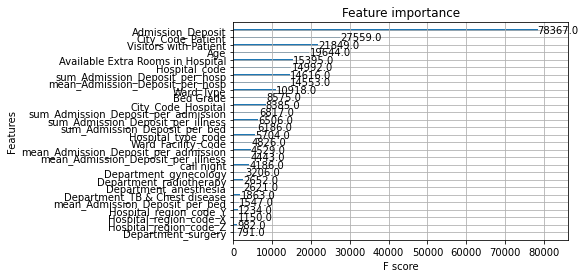

In [21]:
# Show importance of features to understand the model
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import plot_importance
xgb3.feature_importances_
plot_importance(xgb3)
plt.show()

Feature importance: The plot indicates that "Admission Deposit" is an essential feature in the model.

# 5. Test Dataset Prediction & Tabular Classification Results

In [23]:
test = pd.read_csv('Datasets/preprocessed_test_v16_final.csv')
test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,call night,Bed Grade,City_Code_Patient,Visitors with Patient,...,Department_radiotherapy,Department_surgery,sum_Admission_Deposit_per_illness,sum_Admission_Deposit_per_admission,sum_Admission_Deposit_per_bed,sum_Admission_Deposit_per_hosp,mean_Admission_Deposit_per_illness,mean_Admission_Deposit_per_admission,mean_Admission_Deposit_per_bed,mean_Admission_Deposit_per_hosp
0,0.307627,0.487763,-0.566911,-0.165503,1.383073,-1.940856,-1.000168,-0.729986,-1.094641,-0.722758,...,-0.317027,-0.058283,0.880959,-0.237553,0.700047,-0.771083,-0.102237,-1.091217,-0.264517,0.734349
1,1.234125,-0.822919,-0.244563,-1.024428,1.383073,1.011415,-1.000168,-0.729986,-1.094641,0.402568,...,-0.317027,-0.058283,0.880959,0.840568,0.700047,-0.404567,-0.102237,1.031729,-0.264517,1.372250
2,0.886688,-0.167578,-0.889260,-0.165503,-1.102126,-0.169493,0.999832,1.571032,-1.094641,-0.160095,...,-0.317027,-0.058283,0.880959,-0.237553,-1.282764,2.065165,-0.102237,-1.091217,0.782375,0.096284
3,-1.429558,-0.822919,0.400134,-0.165503,-1.102126,1.011415,0.999832,-0.729986,-1.094641,-0.160095,...,-0.317027,-0.058283,0.880959,0.840568,0.700047,0.417472,-0.102237,1.031729,-0.264517,-1.371062
4,1.118313,-0.167578,2.011876,-1.024428,0.140473,1.011415,0.999832,-0.729986,-1.094641,0.402568,...,-0.317027,-0.058283,0.880959,0.840568,0.700047,0.163806,-0.102237,1.031729,-0.264517,-0.414427


In [25]:
# Test model on test set
test_y = xgb3.predict(test)
test_y

array([0, 5, 2, ..., 1, 1, 3], dtype=int64)

In [26]:
test_y_result = pd.read_csv('Results/test_sub_template.csv')
test_y_result.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [27]:
test_y_result['Stay'] = test_y
test_y_result

,case_id,Stay
0,318439,0
1,318440,5
2,318441,2
3,318442,2
4,318443,5
...,...,...
137052,455491,2
137053,455492,0
137054,455493,1
137055,455494,1


In [28]:
# Map 0-10 Stay results to original 0-10, 11-20 etc
dict_col = {'0-10':[0], '11-20':[1], '21-30':[2], '31-40':[3], '41-50':[4], '51-60':[5], '61-70':[6], '71-80':[7], '81-90':[8], '91-100':[9], 'More than 100 Days':[10]}
d = {k: oldk for oldk, oldv in dict_col.items() for k in oldv}
print(d)

{0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'}


In [29]:
test_y_result['Stay'] = test_y_result['Stay'].map(d)
test_y_result

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,21-30
137053,455492,0-10
137054,455493,11-20
137055,455494,11-20


In [30]:
# Final classification results in a table format
test_y_result.groupby(['Stay'])['case_id'].count()

Stay
0-10                   4436
11-20                 38664
21-30                 58105
31-40                 13595
41-50                   137
51-60                 18046
61-70                    29
71-80                   596
81-90                  1190
91-100                   99
More than 100 Days     2160
Name: case_id, dtype: int64

In [31]:
# Save submission results
test_y_result.to_csv('Results/test_sub_v16_0330.csv',index=False)

Comment on the tabular test data results: The final classification results showed more predictions in 21-30 and 11-20, which algins with the skewed data distribution. As there are more data in these two categories, the model tennds to classify the predictions as these two categories. To improve the model performance, more data need to be collected in ohter categories or deep learning models and data augmentation techniques need to be utilized to improve the feature learning process by the model.

In [1]:
!jupyter nbconvert --to html A1_final_modelHyperparameterSelection_v2.ipynb

[NbConvertApp] Converting notebook A1_final_modelHyperparameterSelection_v2.ipynb to html
[NbConvertApp] Writing 702536 bytes to A1_final_modelHyperparameterSelection_v2.html
